In [116]:
from GHEtool import Borefield, GroundData
import numpy as np
import pygfunction as gt

In [117]:
data = GroundData(3.5,   # ground thermal conductivity (W/mK)
                  8.0,  # initial/undisturbed ground temperature (deg C)
                  0.10, # borehole equivalent resistance (mK/W)
                  2.16*10**6) # volumetric heat capacity of the ground (J/m3K) 

In [158]:
# annual heating and cooling load
annual_heating_load = 800 * 10 ** 3  # kWh

# COP
COP = 3.5
annual_heating_load = annual_heating_load - annual_heating_load/COP

monthly_peak_heating = np.array([200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200])
monthly_peak_heating = monthly_peak_heating - monthly_peak_heating/COP
# resulting load per month
monthly_load_heating_percentage = np.array([0.155, 0.148, 0.125, .099, .064, 0., 0., 0., 0.061, 0.087, 0.117, 0.144])
monthly_load_heating = annual_heating_load * monthly_load_heating_percentage   # kWh

In [159]:
# create the borefield object
borefield = Borefield(simulation_period=25, baseload_heating=monthly_load_heating, peak_heating=monthly_peak_heating)

borefield.set_ground_parameters(data)

# set temperature boundaries
#borefield.set_max_ground_temperature(16)  # maximum temperature
#borefield.set_min_ground_temperature(0)  # minimum temperature

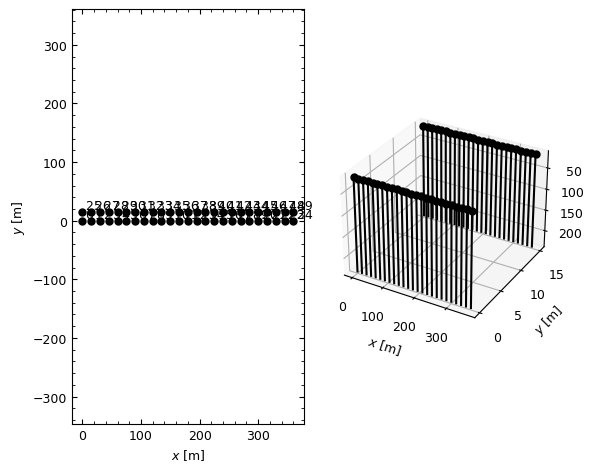

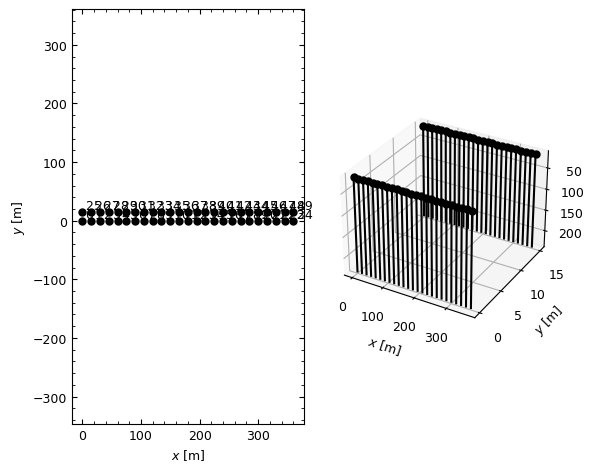

In [177]:
# set borefield
borefield_gt = gt.boreholes.rectangle_field(25, 2, 15, 15, 220, 15, 0.0575) 
borefield.set_borefield(borefield_gt)
gt.boreholes.visualize_field(borefield_gt)

In [181]:
borefield.calculate_temperatures()
print(round(min(borefield.results_month_heating),2))

1.91


In [182]:
print(min(borefield.results_peak_heating))

1.572160843455043


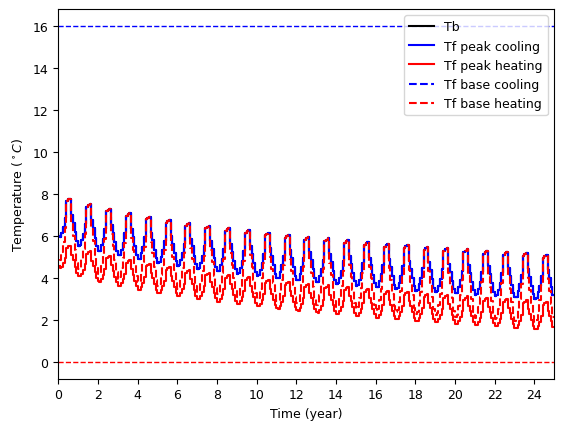

In [184]:
borefield.print_temperature_profile()